In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import os,sys

import time

import seaborn as sns

import scipy

from mpl_toolkits.mplot3d import Axes3D

import matplotlib as mpl

import matplotlib.animation 


from scipy.stats import pearsonr

import matplotlib.gridspec as gridspec


In [2]:
Get_hour=lambda x:int(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(x))[11:13])+float(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(x))[14:16])/60.0

Get_3600=lambda x:round(x/3600.0,2)


class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())


## Objective


Learning a comprehensive inderstanding of Multi-Variate Gaussian Distribution


### Mathematical Definition


**Multivariate normal distribution**


The multivariate normal distribution, multivariate Gaussian distribution, or joint normal distribution is a generalization of the one-dimensional (univariate) normal distribution to higher dimensions.


\begin{equation}
X=\{X_{1},X_{2}\}
\end{equation}

\begin{equation}
E(X)=\{\mu_{1},\mu_{2}\}
\end{equation}


\begin{equation}
\sigma(X)=\{\sigma_{1},\sigma_{2}\}
\end{equation}


Probability Density Distribution:


\begin{equation}
f(X)=\frac{1}{{\sqrt{2\pi}}^{2}\sigma_{1}\sigma_{2}} e^{-\frac{(X_{1}-\mu_{1})^2}{2\sigma_{1}}-\frac{(X_{2}-\mu_{2})^2}{2\sigma_{2}}}
\end{equation}



\begin{equation}
zz^{T}=(X-E(X))\Sigma^{-1}(X-E(X))^{T}
\end{equation}


\begin{equation}
f(X)=\frac{1}{{\sqrt{2\pi}}^{2}|\Sigma|^{\frac{1}{2}}} e^{(X-\mu(X))\Sigma^{-1}(X-\mu(X))^{T}}
\end{equation}


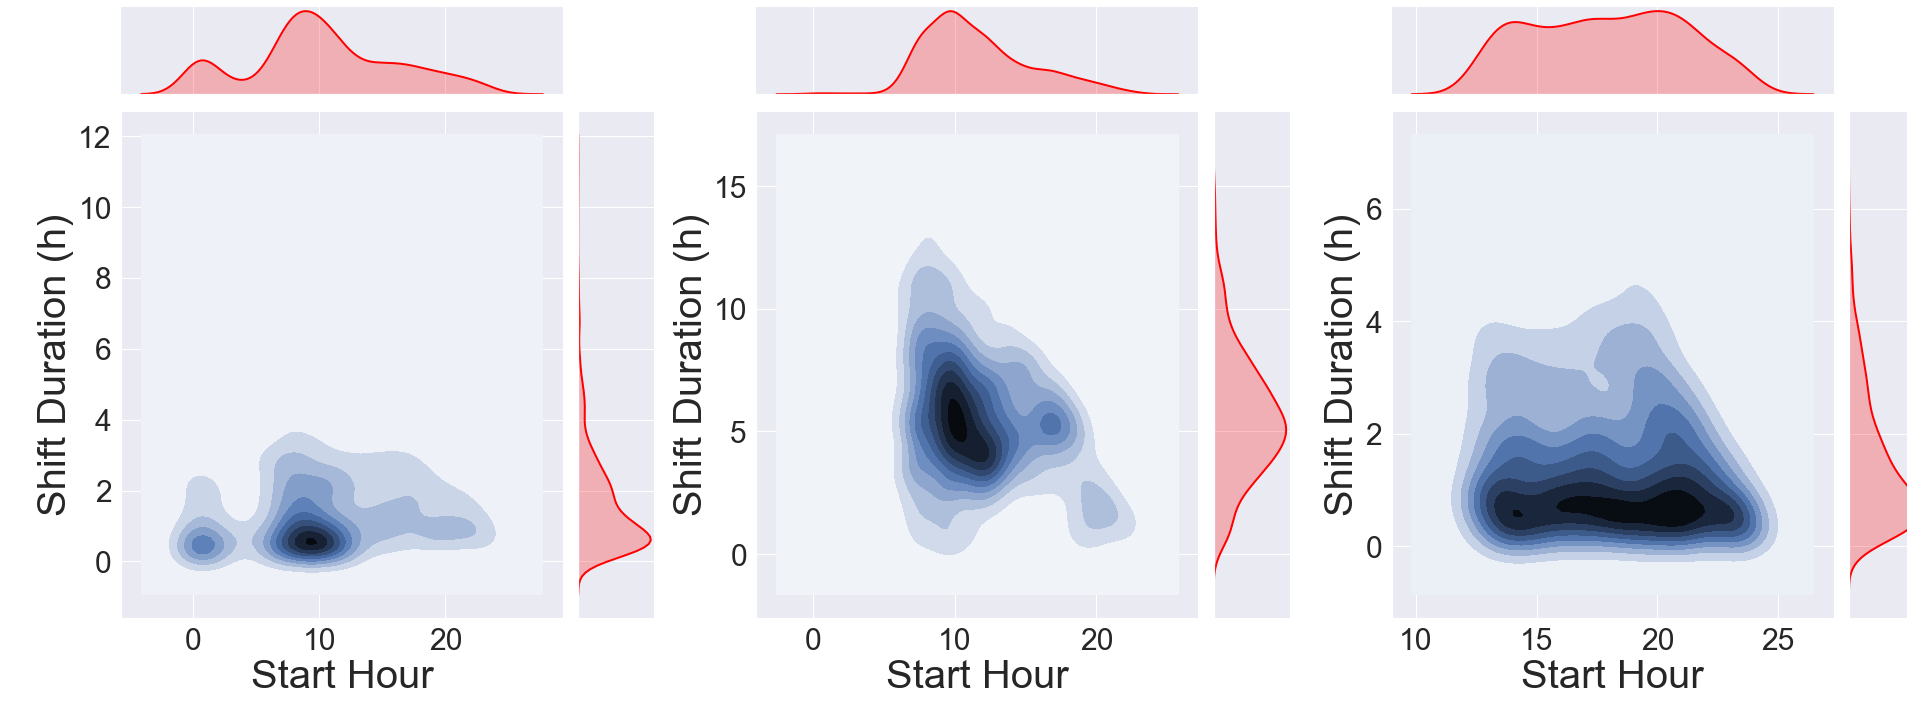

In [6]:
'''Plot testing'''

Summary_path='./Data/Summary/'

Summary=pd.read_csv(os.path.join(Summary_path,'Summary.csv'))

Summary=Summary[['Driver_id', 'Shifts', 'Order Number', 'Shift Duration (sec)', 'Occupied Time (sec)', 'Start Time','End Time','Occupied Distance(m)']]

Driver_Df=pd.read_csv(os.path.join(Summary_path,'Driver_Df.csv'))

Driver_Df=Driver_Df[['Driver_id','label']]

Summary=Summary.merge(Driver_Df,on='Driver_id')

Get_3600=lambda x:round(x/3600.0,2)

Summary['Start Hour']=Summary.apply(lambda x:Get_hour(x['Start Time']),axis=1)

Summary['Shift Duration (h)']=Summary.apply(lambda x:Get_3600(x['Shift Duration (sec)']),axis=1)

Summary=Summary[['Start Hour','Shift Duration (h)','label']]

Summary

fig = plt.figure(figsize=(27, 10))

gs = gridspec.GridSpec(1, 3)


sns.set(rc={'axes.labelsize':40,
            'xtick.labelsize':30,
            'ytick.labelsize':30})



p1 = sns.jointplot(x='Start Hour',\
              y='Shift Duration (h)',\
              data=Summary.loc[Summary['label']=='A'].iloc[:1000],\
              kind='kde',\
              space=0,
              ratio=5,\
              marginal_kws={'lw':2,
                            'color':'red'})

p2 = sns.jointplot(x='Start Hour',\
              y='Shift Duration (h)',\
              data=Summary.loc[Summary['label']=='B'].iloc[:1000],\
              kind='kde',\
              space=0,
              ratio=5,\
              marginal_kws={'lw':2,
                            'color':'red'})

p3 = sns.jointplot(x='Start Hour',\
              y='Shift Duration (h)',\
              data=Summary.loc[Summary['label']=='C'].iloc[:1000],\
              kind='kde',\
              space=0,
              ratio=5,\
              marginal_kws={'lw':2,
                            'color':'red'})

mg0 = SeabornFig2Grid(p1, fig, gs[0])
mg1 = SeabornFig2Grid(p2, fig, gs[1])
mg2 = SeabornFig2Grid(p3, fig, gs[2])

gs.tight_layout(fig)

plt.show()



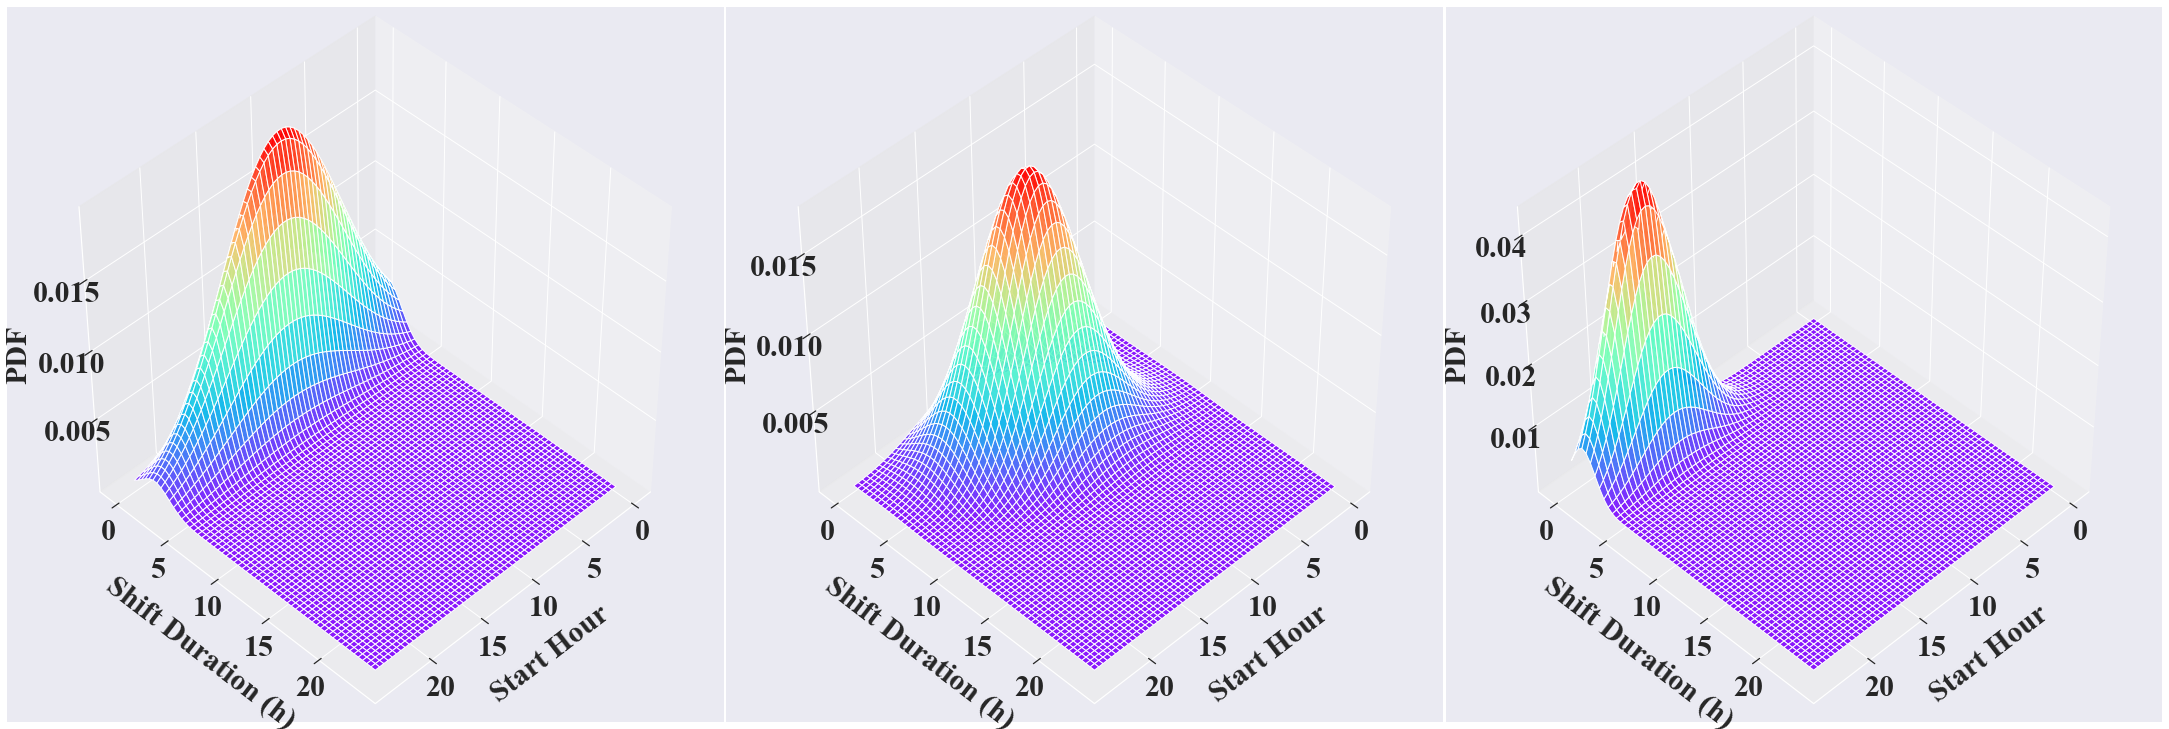

{'A': {'mu_1': 10.635110447392625,
  'std_1': 5.819911954176728,
  'mu_2': 1.6836900221074518,
  'std_2': 1.4062890677949849,
  'Sigma': 0.15950301351610738,
  'max_x': 0,
  'min_y': 0.23,
  'max_y': 4.5},
 'B': {'mu_1': 11.801244817149403,
  'std_1': 3.6532419630560264,
  'mu_2': 5.573946617105365,
  'std_2': 2.6298450785937035,
  'Sigma': -0.3365652068816138,
  'max_x': 0,
  'min_y': 1.28,
  'max_y': 10.32},
 'C': {'mu_1': 17.7985326396587,
  'std_1': 3.1402719847062626,
  'mu_2': 1.5202308911923046,
  'std_2': 1.1673868993959815,
  'Sigma': -0.12156349047425409,
  'max_x': 0,
  'min_y': 0.24,
  'max_y': 3.9}}

In [7]:
Labels=['A','B','C']

'''Plot'''

font_label = {'family' : 'Times New Roman',\
              'weight' : 'normal',\
              'size': 30,\
              'rotation':'vertical'}


mpl.rcParams['font.sans-serif'] = ['SimHei']

mpl.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(30,10))

# ax = Axes3D(fig)

Duration_Param={l:{'mu_1':0,\
                   'std_1':0,\
                   'mu_2':0,\
                   'std_2':0,\
                   'Sigma':0,\
                   'max_x':0,\
                   'min_y':0} for l in Labels}



for i in range(len(Labels)):

    x = np.array(Summary.loc[Summary['label']==Labels[i],'Start Hour'])

    y = np.array(Summary.loc[Summary['label']==Labels[i],'Shift Duration (h)'])


    u1 = x.mean()
    u2 = y.mean()
    
    Duration_Param[Labels[i]]['mu_1']=u1
    Duration_Param[Labels[i]]['mu_2']=u2
    
    o1 = x.std()
    
    o2 = y.std()
    
    Duration_Param[Labels[i]]['std_1']=o1
    Duration_Param[Labels[i]]['std_2']=o2

    p = pearsonr(x, y)[0]
    
    Duration_Param[Labels[i]]['Sigma']=p
    
    y.sort()
    
    Duration_Param[Labels[i]]['min_y'] = y[int(0.05 * len(y))]
    
    Duration_Param[Labels[i]]['max_y'] = y[int(0.95 * len(y))]
    
    

    X_arr=np.arange(0.0,24.0,0.4)

    Y_arr=np.arange(0.0,24.0,0.4)

    X, Y = np.meshgrid(X_arr, Y_arr)

    z = (1/(2*np.pi*o1*o2*pow(1-pow(p,2),0.5)))*np.exp(-1/(2*(1-p*p))*(((X-u1)*(X-u1))/(o1*o1)-2*p*(X-u1)*(Y-u2)/(o1*o2)+(Y-u2)*(Y-u2)/(o2*o2)))


    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    labels = ax.get_xticklabels() + ax.get_yticklabels()+ ax.get_zticklabels()

    [label.set_fontsize(30) for label in labels]

    [label.set_fontname('Times New Roman') for label in labels]


    ax.plot_surface(X, Y, z, cmap='rainbow', rstride=1, cstride=1, alpha=0.9, lw=1)

    ax.set_xlabel("Start Hour",font_label,labelpad=25)

    ax.set_ylabel("Shift Duration (h)",font_label,labelpad=25)

    ax.set_zlabel("PDF",font_label,labelpad=25)

    

    ax.view_init(45,45)


    # phi = np.linspace(0, 2*np.pi) 

    # def update(phi): 

    #     ax.view_init(45, phi*180./np.pi) 

    # ani = matplotlib.animation.FuncAnimation(fig, update, frames=phi) 

    # ani.save("case1.gif", writer='imagemagick', fps=10) 

plt.tight_layout(0.2)

plt.show() 

Duration_Param


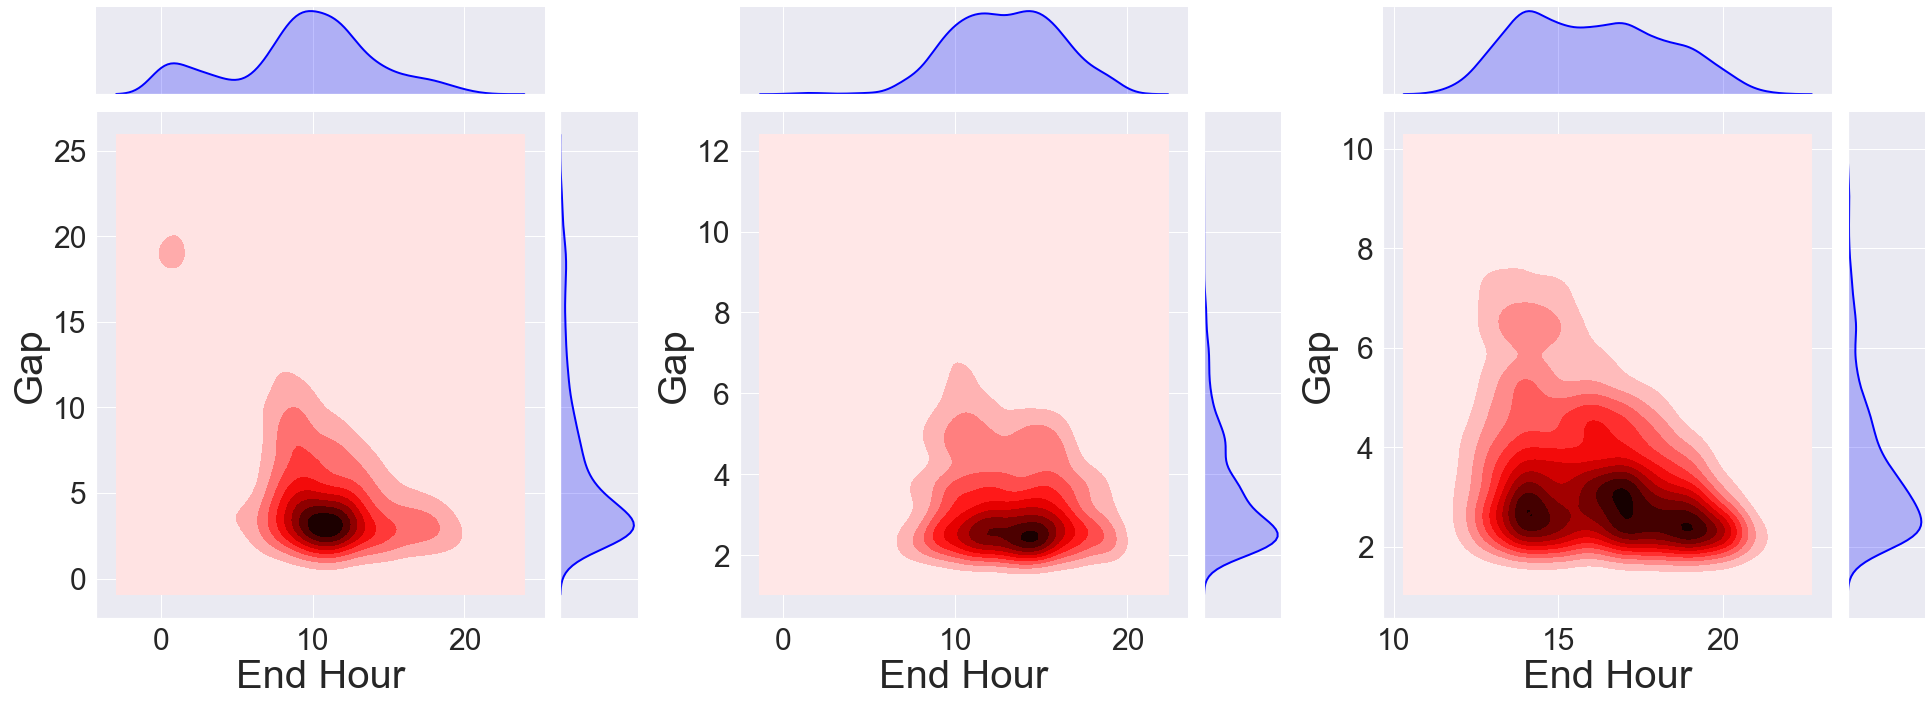

In [8]:
def explode(df, col):
    df[col] = df[col].apply(lambda x: [x] if not isinstance(x, list) else x)
    return df.drop(col, axis=1).join(
        pd.DataFrame(list(df[col])).stack().reset_index(level=1, drop=True).rename(col)
    ) 

Summary_path='./Data/Summary/'

Summary=pd.read_csv(os.path.join(Summary_path,'Summary.csv'))

Summary=Summary.sort_values(by=['Driver_id','Start Time'])

Gap_Df=pd.DataFrame([])

Gap_Df['Start Time']=Summary.groupby('Driver_id').apply(lambda x: x['Start Time'].to_list())

Gap_Df['End Time']=Summary.groupby('Driver_id').apply(lambda x: x['End Time'].to_list())

Gap_Df['Driver_id']=Gap_Df.index

def get_gap(Start,End):
    gap=list()
    if len(Start)==1:
        return gap
    else:
        for i in range(1,len(Start),1):
            gap.append([End[i-1],(Start[i]-End[i-1])/3600.0])
        return gap

Gap_Df['Gaps']=Gap_Df.apply(lambda x:get_gap(x['Start Time'],x['End Time']),axis=1)

Gap_Df['Length']=Gap_Df.apply(lambda x:len(x['Gaps']),axis=1)

Gap_Df=Gap_Df.loc[Gap_Df['Length']>0]

Gap_Df=Gap_Df.reset_index(drop=True)

Gap_Df = Gap_Df[['Driver_id','Gaps']]

Gap_Df=explode(Gap_Df,'Gaps')

Gap_Df['End Time']=Gap_Df.apply(lambda x:x['Gaps'][0],axis=1)

Gap_Df['Gap']=Gap_Df.apply(lambda x:round(x['Gaps'][1],2),axis=1)

Gap_Df['End Hour']=Gap_Df.apply(lambda x:int(Get_hour(x['End Time'])),axis=1)

Gap_Df=Gap_Df.merge(Driver_Df,on='Driver_id')

Gap_Df=Gap_Df[['label','End Hour','Gap']]

fig = plt.figure(figsize=(27, 10))

gs = gridspec.GridSpec(1, 3)


sns.set(rc={'axes.labelsize':40,
            'xtick.labelsize':30,
            'ytick.labelsize':30})

p1 = sns.jointplot(x='End Hour',\
              y='Gap',\
              data=Gap_Df.loc[Gap_Df['label']=='A'].iloc[:1000],\
              kind='kde',\
              color='red',\
              space=0,
              ratio=5,\
              marginal_kws={'lw':2,
                            'color':'blue'})

p2 = sns.jointplot(x='End Hour',\
              y='Gap',\
              data=Gap_Df.loc[Gap_Df['label']=='B'].iloc[:1000],\
              kind='kde',\
              color='red',\
              space=0,
              ratio=5,\
              marginal_kws={'lw':2,
                            'color':'blue'})

p3 = sns.jointplot(x='End Hour',\
              y='Gap',\
              data=Gap_Df.loc[Gap_Df['label']=='C'].iloc[:1000],\
              kind='kde',\
              color='red',\
              space=0,
              ratio=5,\
              marginal_kws={'lw':2,
                            'color':'blue'})

mg0 = SeabornFig2Grid(p1, fig, gs[0])

mg1 = SeabornFig2Grid(p2, fig, gs[1])

mg2 = SeabornFig2Grid(p3, fig, gs[2])

gs.tight_layout(fig)

plt.show()



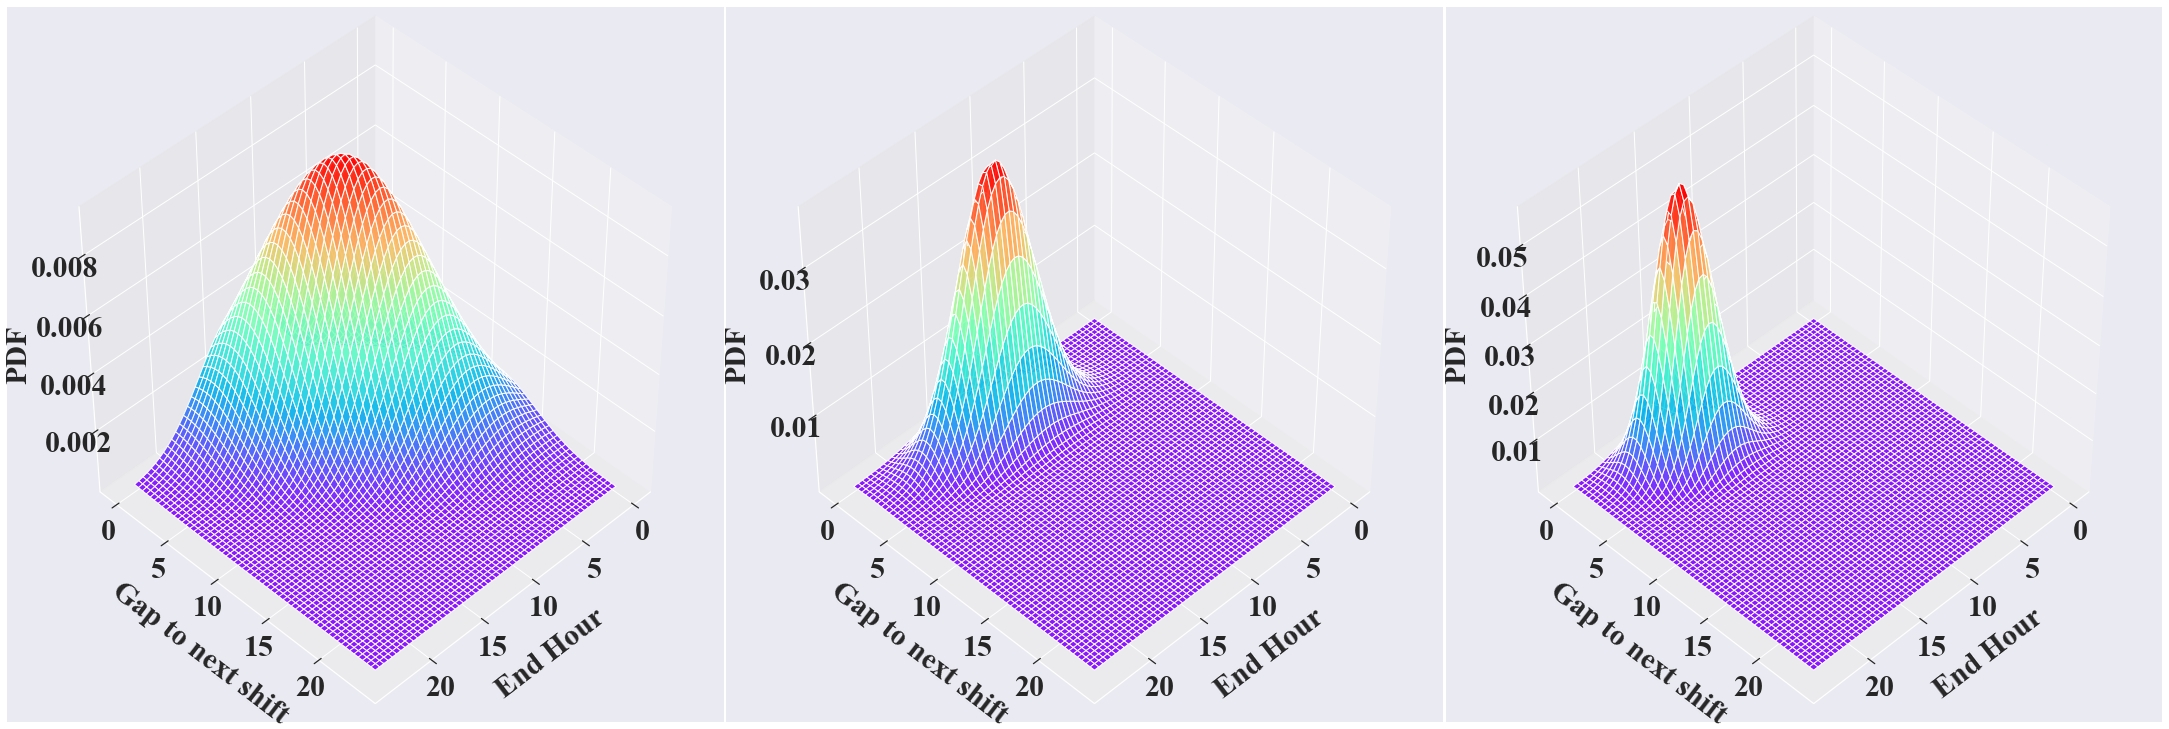

{'A': {'mu_1': 9.39545119282251,
  'std_1': 4.740183467692569,
  'mu_2': 6.281753866244272,
  'std_2': 4.6850865353741336,
  'Sigma': -0.6471740293898826,
  'min_y': 2.15,
  'max_y': 17.39},
 'B': {'mu_1': 12.994123724654527,
  'std_1': 3.060714832307173,
  'mu_2': 3.5286142322097374,
  'std_2': 1.4420919632133062,
  'Sigma': -0.2560424104767621,
  'min_y': 2.08,
  'max_y': 6.43},
 'C': {'mu_1': 15.961794078970751,
  'std_1': 2.1041233644720743,
  'mu_2': 3.5734459963748804,
  'std_2': 1.4370159439098773,
  'Sigma': -0.3617981161586786,
  'min_y': 2.08,
  'max_y': 6.55}}

In [9]:
Labels=['A','B','C']

'''Plot'''

font_label = {'family' : 'Times New Roman',\
              'weight' : 'normal',\
              'size': 30,\
              'rotation':'vertical'}

mpl.rcParams['font.sans-serif'] = ['SimHei']

mpl.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(30,10))

Gap_Param={l:{'mu_1':0,\
              'std_1':0,\
              'mu_2':0,\
              'std_2':0,\
              'Sigma':0} for l in Labels}

for i in range(len(Labels)):

    x = np.array(Gap_Df.loc[Gap_Df['label']==Labels[i],'End Hour'])

    y = np.array(Gap_Df.loc[Gap_Df['label']==Labels[i],'Gap'])


    u1 = x.mean()
    u2 = y.mean()
    o1 = x.std()
    o2 = y.std()
    
    Gap_Param[Labels[i]]['mu_1']=u1
    Gap_Param[Labels[i]]['mu_2']=u2
    
    Gap_Param[Labels[i]]['std_1']=o1
    Gap_Param[Labels[i]]['std_2']=o2

    p = pearsonr(x, y)[0]
    
    Gap_Param[Labels[i]]['Sigma']=p
    
    y.sort()
    
    Gap_Param[Labels[i]]['min_y'] = y[int(0.05 * len(y))]
    
    Gap_Param[Labels[i]]['max_y'] = y[int(0.95 * len(y))]
    

    X_arr=np.arange(0.0,24.0,0.4)

    Y_arr=np.arange(0.0,24.0,0.4)

    X, Y = np.meshgrid(X_arr, Y_arr)

    z = (1/(2*np.pi*o1*o2*pow(1-pow(p,2),0.5)))*np.exp(-1/(2*(1-p*p))*(((X-u1)*(X-u1))/(o1*o1)-2*p*(X-u1)*(Y-u2)/(o1*o2)+(Y-u2)*(Y-u2)/(o2*o2)))

    '''Plot'''
    
    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    labels = ax.get_xticklabels() + ax.get_yticklabels()+ ax.get_zticklabels()

    [label.set_fontsize(30) for label in labels]

    [label.set_fontname('Times New Roman') for label in labels]

    ax.plot_surface(X, Y, z, cmap='rainbow', rstride=1, cstride=1, alpha=0.9, lw=1)

    ax.set_xlabel("End Hour",font_label,labelpad=25)

    ax.set_ylabel("Gap to next shift",font_label,labelpad=25)

    ax.set_zlabel("PDF",font_label,labelpad=25)

    ax.view_init(45,45) 

    # phi = np.linspace(0, 2*np.pi) 

    # def update(phi): 

    #     ax.view_init(45, phi*180./np.pi) 

    # ani = matplotlib.animation.FuncAnimation(fig, update, frames=phi) 

    # ani.save("case2.gif", writer='imagemagick', fps=10) 

plt.tight_layout(0.2)

plt.show()

Gap_Param

In [44]:

Save_Path='./Data/Estimation/'

np.save(os.path.join(Save_Path,'Duration_Param.npy'),Duration_Param)

np.save(os.path.join(Save_Path,'Gap_Param.npy'),Gap_Param)

